In [18]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# YİNELEMELİ SİNİR AĞI KATMANLARININ OLUŞTURULMASI

In [1]:
from keras.layers import SimpleRNN

In [2]:
from keras.models import Sequential
from keras.layers import Embedding

## Örnek 1 : bir RNN katmanı 

In [4]:
model = Sequential()
model.add(Embedding( 1000 , 32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          32000     
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 34,080
Trainable params: 34,080
Non-trainable params: 0
_________________________________________________________________


## Örnek 2 : Boyutlandırılmış RNN katmanları

In [6]:
model = Sequential()
model.add(Embedding( 1000 , 32))
model.add(SimpleRNN(32 , return_sequences=  True))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          32000     
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
Total params: 34,080
Trainable params: 34,080
Non-trainable params: 0
_________________________________________________________________


## Örnek 3 :  Ardışık  RN katmanları

In [7]:
model = Sequential()
model.add(Embedding( 1000 , 32))
model.add(SimpleRNN(32 , return_sequences=  True))
model.add(SimpleRNN(32 , return_sequences=  True))
model.add(SimpleRNN(32 , return_sequences=  True))
model.add(SimpleRNN(32 , return_sequences=  True))
model.add(SimpleRNN(32 ))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          32000     
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, 32)                2080      
Total params: 42,400
Trainable params: 42,400
Non-trainable params: 0
__________________________________________________

## IMDB VERİ KÜMESİNİ HAZIRLAMAK

IMDB : Intermet Movie Database ( internet Film Tabanı)

In [8]:
from keras.datasets import imdb
from keras.preprocessing import sequence

In [9]:
num_features = 1000
max_len = 500
batch_size = 32

In [10]:
print("Load data...")
(input_train , y_train) , (input_test , y_test) = imdb.load_data(num_words= num_features)

print(len(input_train), "eğitim dizisi")
print(len(input_test), "test dizisi")

Load data...
17473536/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])


25000 eğitim dizisi
25000 test dizisi


/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [13]:
print("Pad sequnce ( sample x train) ")

input_train = sequence.pad_sequences(input_train , maxlen = max_len)
input_test = sequence.pad_sequences(input_test , maxlen = max_len)

print(len(input_train), "eğitim dizisi", input_train.shape)
print(len(input_test), "test dizisi", input_test.shape)

Pad sequnce ( sample x train) 
25000 eğitim dizisi (25000, 500)
25000 test dizisi (25000, 500)


## EMBEDDING ve SimpleRNN Katmanlarının Eğitilmesi 

In [14]:
from keras.layers import Dense 
from keras import layers

### basit RNN ile modelleme

In [32]:
model = Sequential()
model.add(Embedding(num_features , 32))
model.add(SimpleRNN(32))
model.add(Dense(1 , activation= "sigmoid"))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, None, 32)          32000     
_________________________________________________________________
simple_rnn_10 (SimpleRNN)    (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 34,113
Trainable params: 34,113
Non-trainable params: 0
_________________________________________________________________


### basit bir LSTM ile modelleme

In [33]:
model = Sequential()
model.add(layers.Embedding(num_features , 32))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(Dense(1 , activation= "sigmoid"))
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, None, 32)          32000     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                16640     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 48,705
Trainable params: 48,705
Non-trainable params: 0
_________________________________________________________________


### modelin derlenmesi RNN

In [19]:
model.compile(optimizer= "rmsprop" , loss = "binary_crossentropy" , metrics= ["acc"])

history = model.fit( input_train , y_train,
                    epochs = 10,
                    batch_size = 128 , 
                    validation_split = 0.2 )

Epoch 1/10
157/157 [==============================] - 26s 156ms/step - loss: 0.2632 - acc: 0.8938 - val_loss: 0.4969 - val_acc: 0.8282
Epoch 2/10
157/157 [==============================] - 24s 153ms/step - loss: 0.2443 - acc: 0.9065 - val_loss: 0.4955 - val_acc: 0.8208
Epoch 3/10
157/157 [==============================] - 24s 152ms/step - loss: 0.1950 - acc: 0.9267 - val_loss: 0.5020 - val_acc: 0.8166
Epoch 4/10
157/157 [==============================] - 24s 151ms/step - loss: 0.1948 - acc: 0.9242 - val_loss: 0.5444 - val_acc: 0.8210
Epoch 5/10
157/157 [==============================] - 24s 153ms/step - loss: 0.2167 - acc: 0.9232 - val_loss: 0.7832 - val_acc: 0.7010
Epoch 6/10
157/157 [==============================] - 24s 152ms/step - loss: 0.1776 - acc: 0.9336 - val_loss: 0.6288 - val_acc: 0.7728
Epoch 7/10
157/157 [==============================] - 24s 154ms/step - loss: 0.1568 - acc: 0.9445 - val_loss: 0.6680 - val_acc: 0.7798
Epoch 8/10
157/157 [==============================] - 2

## modelin derlenmesi LSTM

In [31]:
model.compile(optimizer= "rmsprop" , loss = "binary_crossentropy" , metrics= ["acc"])

history = model.fit( input_train , y_train,
                    epochs = 10,
                    batch_size = 128 , 
                    validation_split = 0.2 )

Epoch 1/10
157/157 [==============================] - 102s 607ms/step - loss: 0.6325 - acc: 0.6395 - val_loss: 0.5804 - val_acc: 0.7266
Epoch 2/10
157/157 [==============================] - 94s 598ms/step - loss: 0.4237 - acc: 0.8182 - val_loss: 0.3548 - val_acc: 0.8502
Epoch 3/10
157/157 [==============================] - 94s 599ms/step - loss: 0.3687 - acc: 0.8434 - val_loss: 0.3808 - val_acc: 0.8424
Epoch 4/10
157/157 [==============================] - 103s 659ms/step - loss: 0.3469 - acc: 0.8559 - val_loss: 0.4119 - val_acc: 0.8476
Epoch 5/10
157/157 [==============================] - 104s 662ms/step - loss: 0.3371 - acc: 0.8603 - val_loss: 0.3534 - val_acc: 0.8474
Epoch 6/10
157/157 [==============================] - 105s 672ms/step - loss: 0.3187 - acc: 0.8677 - val_loss: 0.3353 - val_acc: 0.8594
Epoch 7/10
157/157 [==============================] - 106s 674ms/step - loss: 0.3173 - acc: 0.8707 - val_loss: 0.4902 - val_acc: 0.8320
Epoch 8/10
157/157 [==============================

## SONUÇLARIN ÇİZDİRİLMESİ

In [20]:
import matplotlib.pyplot as plt

In [25]:
acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

In [26]:
epochs = range(1 ,len(acc) + 1)

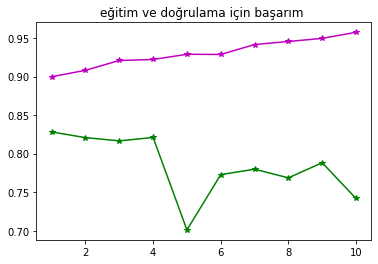

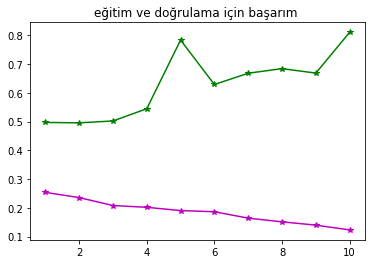

In [28]:
plt.plot(epochs , acc , "m*-", label = "eğitim başarımı")
plt.plot(epochs , val_acc , "g*-", label = "doğrulama/ geçerleme başarımı")
plt.title("eğitim ve doğrulama için başarım ")

plt.figure()

plt.plot(epochs , loss , "m*-", label = "eğitim kaybı")
plt.plot(epochs , val_loss , "g*-", label = "doğrulama/ geçerleme kaybı")
plt.title("eğitim ve doğrulama için başarım ")
plt.show()

In [29]:
print(acc , "eğitim başarımları")

[0.8998500108718872, 0.9082000255584717, 0.9209499955177307, 0.922249972820282, 0.9290000200271606, 0.9287499785423279, 0.9416499733924866, 0.9455999732017517, 0.94964998960495, 0.9575999975204468] eğitim başarımları


In [34]:
acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

In [35]:
epochs = range(1 ,len(acc) + 1)

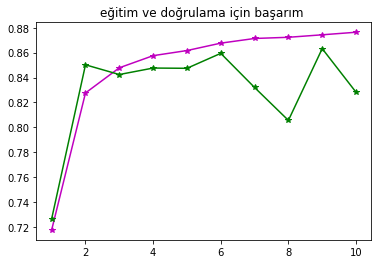

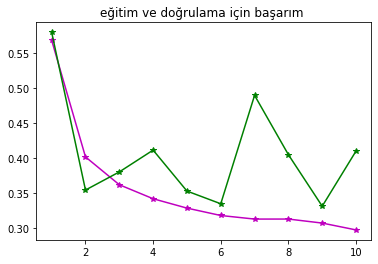

In [36]:
plt.plot(epochs , acc , "m*-", label = "eğitim başarımı")
plt.plot(epochs , val_acc , "g*-", label = "doğrulama/ geçerleme başarımı")
plt.title("eğitim ve doğrulama için başarım ")

plt.figure()

plt.plot(epochs , loss , "m*-", label = "eğitim kaybı")
plt.plot(epochs , val_loss , "g*-", label = "doğrulama/ geçerleme kaybı")
plt.title("eğitim ve doğrulama için başarım ")
plt.show()